<a href="https://colab.research.google.com/github/AlexanderBelfort/MDPRKT/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Mining**

In [ ]:
# test opening files for weird characters / symbols

# for all_transcript data_in file
# file_read

In [ ]:
# concatenate all text files to create one big text file

# import fileinput
# import glob

# file_list = glob.glob("*.txt")

# with open('result.txt', 'w') as file:
#     input_lines = fileinput.input(file_list)
#     file.writelines(input_lines)

**Text Cleaning**

In [1]:
### clean

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re

# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
  # turn a doc into clean tokens

def clean_doc(doc):

  # toLower
  doc = doc.lower()
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

# load the gallstones document
filename1 = 'result.txt'
text = load_doc(filename1)
tokens1 = clean_doc(text)

print(tokens1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['researcher', 'participant', 'start', 'audio', 'recording', 'trial', 'id', 'date', 'august', 'end', 'audio', 'recording', 'start', 'audio', 'recording', 'im', 'bad', 'honest', 'mild', 'discomfort', 'live', 'bothered', 'slight', 'stinging', 'pain', 'round', 'back', 'area', 'much', 'thing', 'tuesday', 'evening', 'sharp', 'pain', 'onset', 'last', 'thought', 'oh', 'go', 'going', 'back', 'luckily', 'went', 'cup', 'coffee', 'minutes', 'later', 'gone', 'youve', 'never', 'yellow', 'past', 'eyes', 'yellow', 'motions', 'urine', 'ever', 'change', 'colour', 'really', 'otherwise', 'fit', 'well', 'yeah', 'diabetic', 'asthmatic', 'operations', 'past', 'yeah', 'malignant', 'melanoma', 'skin', 'cancer', 'groin', 'clearance', 'mole', 'took', 'piece', 'think', 'ive', 'ones', 'nothing', 'cut', 'neck', 'back', 'tablets', 'cetirizine', 'hayfever', 'allergies', 'allergic', 'dust', 'pollens', 'okay'

In [2]:
print(len(tokens1))

23210


In [4]:
from os import listdir
from collections import Counter

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
  # load doc
  
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # update counts
  vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):

  # walk through all files in the folder

  for filename in listdir(directory):
    # create the full path of the file to open
    path = directory + '/' + filename
    # add doc to vocab
    add_doc_to_vocab(path, vocab)
  
# define vocab
vocab = Counter()

# add all docs to vocab
# this is my words + katie's first file
process_docs('gallstones', vocab)

# print the size of the vocab
print('Words in the vocab: ', len(vocab), '\n')

# print the top words in the vocab

Words in the vocab:  2613 



In [5]:
prettyPrint = dict(vocab.most_common(50))

for k, v in prettyPrint.items():
  print (k, '---->', v)

okay ----> 379
yeah ----> 324
surgery ----> 291
thats ----> 259
go ----> 243
like ----> 243
would ----> 243
right ----> 241
dont ----> 240
get ----> 238
operation ----> 229
pain ----> 226
know ----> 212
well ----> 188
think ----> 187
going ----> 174
one ----> 166
want ----> 166
got ----> 164
gallbladder ----> 152
trial ----> 149
ive ----> 145
people ----> 145
symptoms ----> 145
time ----> 142
take ----> 141
gallstones ----> 135
yes ----> 135
study ----> 131
im ----> 124
say ----> 123
youve ----> 122
fine ----> 119
see ----> 106
need ----> 106
back ----> 100
things ----> 98
really ----> 95
inaudible ----> 89
anything ----> 86
patients ----> 83
months ----> 83
treatment ----> 81
put ----> 80
obviously ----> 80
thing ----> 79
come ----> 78
give ----> 77
stones ----> 75
much ----> 73


**Build the word cloud**


Now we are ready to build the wordcloud. We can create a WordCloud object, by passing it the size of the wordcloud, the list of stopwords, the background color and the minimum font size.

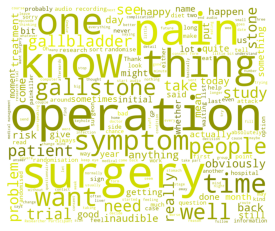

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

file_content=open ("gallstones/result.txt").read()

stoppwords = ["R1", "R2", "P1", "P2", "ve", "Okay", "Yeah", "right", "think", "will", "now", "go", "got", "yes", "fine", "say", "going"]

wordcloud = WordCloud(
                            stopwords = stoppwords + list(STOPWORDS),
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Plot results in a more clear way**

Finally, we are ready to plot results. We can exploit the imshow() function provided by the matplotlib library.

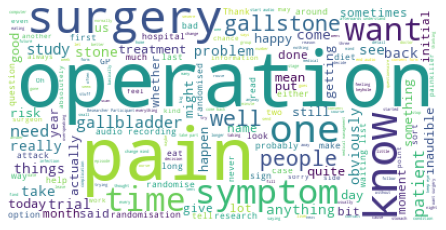

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS




file_content=open ("gallstones/result.txt").read()

stoppwords = ["R1", "R2", "P1", "P2", "ve", "Okay", "Yeah", "right", "think", "will", "now", "go", "got", "yes", "fine", "say", "going", "thing"]

wordcloud = WordCloud(
                            stopwords = stoppwords + list(STOPWORDS),
                            background_color = 'white'
                            ).generate(file_content)
plt.figure(figsize = (8, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

plt.tight_layout(pad = 0) 
plt.savefig('word_cloud.png')
plt.show() 